# Introduction

Introduction cell, the introduction will consist of:

- Introduction text
- Overview of previous module content
- Table of contents for this module

In [1]:
cat('Data loading, please wait\n')
dataframe <- read.csv(file="Data/main_data.csv", encoding="UTF-8", header=TRUE, sep=",")
cat('Data loaded!')

Data loading, please wait
Data loaded!

# Training and Test Data

Export the training and test set data as seperate data. Then make sure the previous 4 modules only use the training set. 

In [33]:
dataframe$hospital_death <- as.factor(dataframe$hospital_death)

In [34]:
suppressMessages(library(caret))

# Setting seed value to reproduce results of random sampling
set.seed(123)

# row positions for training data
index <- createDataPartition(dataframe$hospital_death, p = 0.80, list = FALSE)

# Creating training data
trainingData <- dataframe[index, ]  
cat('The number of traning data observations:', length(trainingData$hospital_death), '\n') # Checking the amount of training data

# Creating test data
testData  <- dataframe[-index, ]  
cat('The number of test data observations:', length(testData$hospital_death)) # Checking the amount of test data

The number of traning data observations: 73371 
The number of test data observations: 18342

# Logistic Regression

In [35]:
# Build the model on training data
cat('Training model, please be patient...')
mylogit <- train(hospital_death ~ ., data = trainingData, method = 'glm', family = 'binomial', na.action=na.omit)
cat('Model trained!')

Training model, please be patient...

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading

Model trained!

In [36]:
modelPred <- predict(mylogit, newdata = testData, method = "glm", na.action = na.pass)
cat('Model successfully applied to test data!')

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

Model successfully applied to test data!

In [37]:
# Create Confusion matrix
cm <- confusionMatrix(modelPred, testData$hospital_death)
## Show confusion matrix
cm

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 6591  557
         1 8891  853
                                          
               Accuracy : 0.4407          
                 95% CI : (0.4332, 0.4482)
    No Information Rate : 0.9165          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0083          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.42572         
            Specificity : 0.60496         
         Pos Pred Value : 0.92208         
         Neg Pred Value : 0.08754         
             Prevalence : 0.91653         
         Detection Rate : 0.39018         
   Detection Prevalence : 0.42316         
      Balanced Accuracy : 0.51534         
                                          
       'Positive' Class : 0               
                        

# Decision Trees

In [38]:
library(rpart)
library(rpart.plot)

In [40]:
# Train Decision Tree
print('Attempting')
train_decision_tree <- rpart(hospital_death ~ ., data = trainingData, method = 'class')
print('Success')

[1] "Attempting"
[1] "Success"


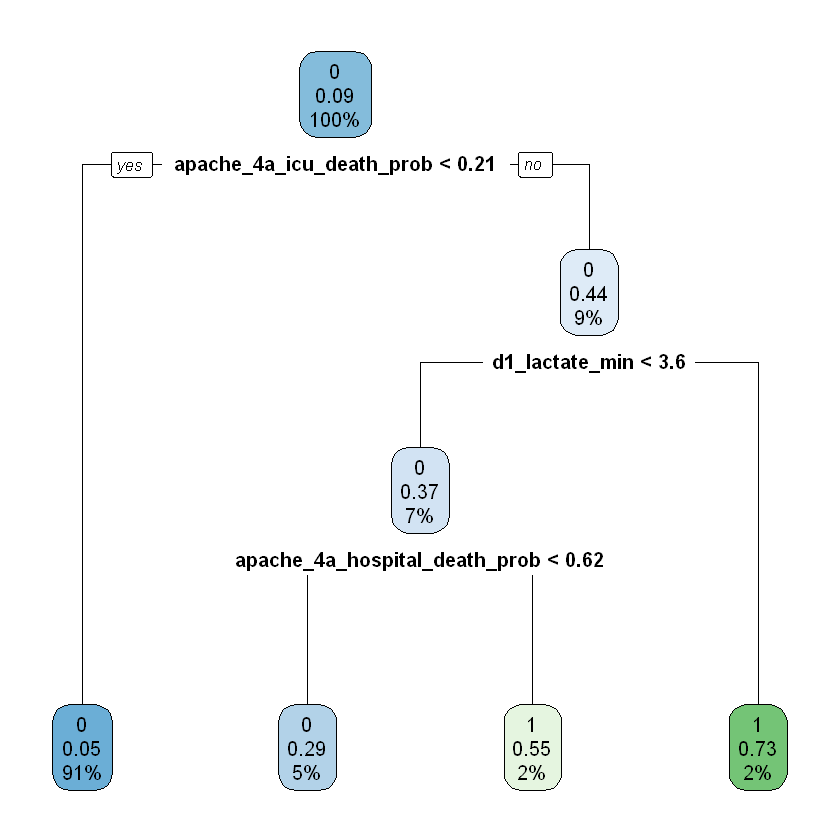

In [41]:
# Plot Decision Tree
rpart.plot(train_decision_tree)

In [46]:
# Make prediction
test_decision_tree <- predict(train_decision_tree, testData, type = 'class')
# Display Confusion Matrix
confusionMatrix(test_decision_tree, testData$hospital_death)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 16512  1154
         1   247   429
                                          
               Accuracy : 0.9236          
                 95% CI : (0.9197, 0.9274)
    No Information Rate : 0.9137          
    P-Value [Acc > NIR] : 6.001e-07       
                                          
                  Kappa : 0.346           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9853          
            Specificity : 0.2710          
         Pos Pred Value : 0.9347          
         Neg Pred Value : 0.6346          
             Prevalence : 0.9137          
         Detection Rate : 0.9002          
   Detection Prevalence : 0.9631          
      Balanced Accuracy : 0.6281          
                                          
       'Positive' Class : 0               
                  

# Evaluation

Consider upgrading the ROC curve aesthetics using [this package](https://sachsmc.github.io/plotROC/) instead

## Evaluation: Logistic Regression

In [48]:
library(pROC)

Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



Setting levels: control = 0, case = 1
Setting direction: controls < cases


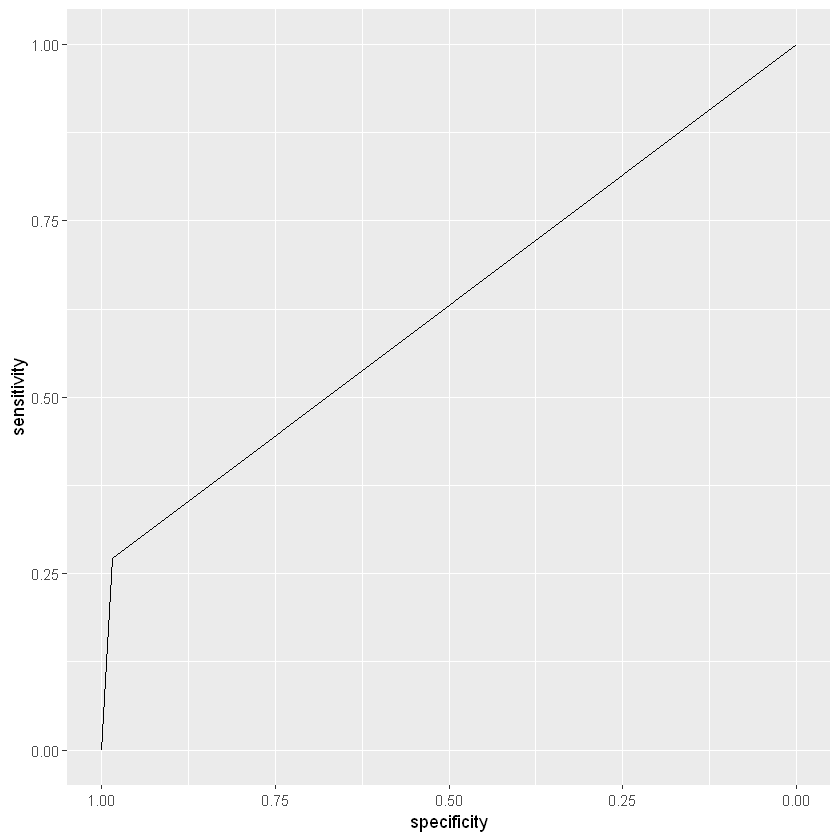

In [51]:
ROC <- roc(response = testData$hospital_death, predictor = factor(test_decision_tree, 
                                                           ordered = TRUE))

# Plot ROC with ggplot2
plot_ROC <- ggroc(ROC)
plot_ROC

## Evaluation: Decision Trees

Setting levels: control = 0, case = 1
Setting direction: controls < cases


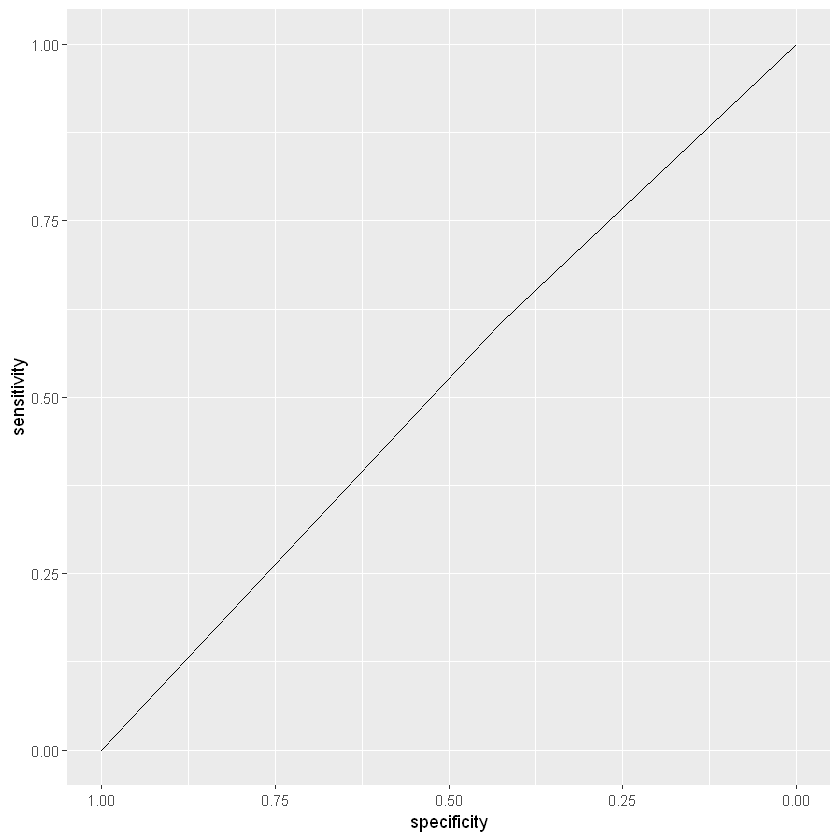

In [55]:
ROC <- roc(response = testData$hospital_death, predictor = factor(modelPred, 
                                                           ordered = TRUE))

# Plot ROC with ggplot2
plot_ROC <- ggroc(ROC)
plot_ROC

# Machine Learning Exercise

Exercise will consist of two part:

- Receive sample feature representation, will then need to figure out which model is superior
    - Make context specific, for this case we will care more about specificity
    - Make one function for running the model, one function for returning ROC, one function for sensitivity, one function for specificity
- Experiment with different feature representations, will then need to beat model performance from the previous part of the exercise

In [ ]:
# Create function to test models
test_model <- function(features){
    # Build the model on training data
    cat('Training model, please be patient...\n')
    total_variables <- append(features, 'TOTEXP09')
    play_trainingData <- subset(trainingData,select = total_variables)
    play_testData <- subset(testData,select = total_variables)
    suppressMessages(attach(trainingData))
    mylogit <- suppressWarnings(train(TOTEXP09~., data = play_trainingData, method = 'glm', family = 'binomial',na.action=na.omit))
    detach(trainingData)

    cat('Model trained!\n')
    # Apply the model to test data
    modelPred.na <- predict(mylogit, newdata = play_testData, method = "glm", na.action = na.pass)

    cat('Model successfully applied to test data!\n')

    # Create Confusion matrix
    cm <- confusionMatrix(modelPred.na, play_testData$TOTEXP09)
    ## Show confusion matrix
    print(cm)

    # Create a ROC curve
    ROC <- roc(response =play_testData$TOTEXP09, predictor = factor(modelPred.na, 
                                                               ordered = TRUE, 
                                                               levels = c('low_risk', 'high_risk')))
    # Plot ROC with ggplot2
    plot_ROC <- ggroc(ROC)
    print(plot_ROC)
    
    # Calculate the area under the curve (AUC)
    cat('AUC:', round(auc(ROC), 2),'\n')
    test <- varImp(mylogit)
    ggplot(test)
}


In [ ]:
colnames(trainingData)

From the list of features above, pick the features you believe are the most predictive for determining mortality. Feel free to use our earlier analysis to inform which features you pick (this will help you make a more informed choice). You can type in your features in between the brackets below. Please follow the format shown in the example below.

<code>features = c('REGION09','SEX','RACETHNX')</code>

Be careful! If there are any typo, this will not work and you will need to run the code below again with the typo corrected. 

In [ ]:
features = c("ASACUT53","ADAPPT42","CHAPPT42")

Now we will see how our model performs using the features you selected. The below code will output evaluation metrics. 

In [ ]:
test_model(features)

# Module Conclusion

Concluding cell, the conclusion will consist of

- Brief overview of module content
- Connection to end of module quiz

Need to include machine learning exercise in this section